<a href="https://colab.research.google.com/github/StuPidMRE/Deeplearn/blob/main/week01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#what's the meaning of the '!' before pip?
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()#what's this?

     |████████████████████████████████| 727kB 8.3MB/s 
     |████████████████████████████████| 1.2MB 14.1MB/s 
     |████████████████████████████████| 204kB 38.2MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
Mounted at /content/gdrive


In [ ]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image',cmap='Greys')

In [ ]:
path= untar_data(URLs.MNIST)#get the path

In [ ]:
Path.BASE_PATH=path#is this necessary?

In [ ]:
path.ls()#to look at the content in the directory 

(#2) [Path('testing'),Path('training')]

In [ ]:
(path/'training').ls()

(#10) [Path('training/4'),Path('training/8'),Path('training/5'),Path('training/0'),Path('training/9'),Path('training/3'),Path('training/6'),Path('training/1'),Path('training/2'),Path('training/7')]

In [ ]:
#(path/'valid').ls()

(#2) [Path('valid/3'),Path('valid/7')]

In [ ]:
(path/'train#').ls()

(#2) [Path('train/3'),Path('train/7')]

In [ ]:
zeros=(path/'training'/'0').ls().sorted()
ones=(path/'training'/'1').ls().sorted()
twos=(path/'training'/'2').ls().sorted()
threes=(path/'training'/'3').ls().sorted()
fours=(path/'training'/'4').ls().sorted()
fives=(path/'training'/'5').ls().sorted()
sixs=(path/'training'/'6').ls().sorted()
sevens=(path/'training'/'7').ls().sorted()
eights=(path/'training'/'8').ls().sorted()
nines=(path/'training'/'9').ls().sorted()

In [ ]:
im0_path=zeros[2]#the second item in the sevens
im0=Image.open(im0_path)#open the picture
im0

In [ ]:
#threes=(path/'train'/'3').ls().sorted()


In [ ]:
zero_tensors=[tensor(Image.open(o)) for o in zeros]
one_tensors=[tensor(Image.open(o)) for o in ones]
two_tensors=[tensor(Image.open(o)) for o in twos]
three_tensors=[tensor(Image.open(o)) for o in threes]
four_tensors=[tensor(Image.open(o)) for o in fours]
five_tensors=[tensor(Image.open(o)) for o in fives]
six_tensors=[tensor(Image.open(o)) for o in sixs]
seven_tensors=[tensor(Image.open(o)) for o in sevens]
eight_tensors=[tensor(Image.open(o)) for o in eights]
nine_tensors=[tensor(Image.open(o)) for o in nines]
len(three_tensors),len(seven_tensors),len(one_tensors),len(two_tensors),len(three_tensors),len(four_tensors),len(five_tensors),len(six_tensors),len(eight_tensors),len(nine_tensors)

(6131, 6265, 6742, 5958, 6131, 5842, 5421, 5918, 5851, 5949)

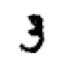

In [ ]:
show_image(three_tensors[0])

In [ ]:
stacked_sevens=torch.stack(seven_tensors).float()/255
stacked_threes=torch.stack(three_tensors).float()/255
stacked_zeros=torch.stack(zero_tensors).float()/255
stacked_ones=torch.stack(one_tensors).float()/255
stacked_twos=torch.stack(two_tensors).float()/255
stacked_threes=torch.stack(three_tensors).float()/255
stacked_fourns=torch.stack(four_tensors).float()/255
stacked_fives=torch.stack(five_tensors).float()/255
stacked_sevens=torch.stack(seven_tensors).float()/255
stacked_sixs=torch.stack(six_tensors).float()/255
stacked_eights=torch.stack(eight_tensors).float()/255
stacked_nines=torch.stack(nine_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [ ]:
#get the tensor's rank
#way 1 len(stacked_sevens.shape)
#way 2
stacked_sevens.ndim

3

In [ ]:
a_3=stacked_threes[1]
a_7=stacked_sevens[1]

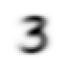

In [ ]:
mean3=stacked_threes.mean(0)
show_image(mean3)

In [ ]:
dist_3_abs=(a_3-mean3).abs().mean()
dist_3_sqr=(a_3-mean3**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2804))

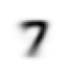

In [ ]:
mean7=stacked_sevens.mean(0)
show_image(mean7)

In [ ]:
dist_7_abs=(a_7-mean7).abs().mean()
dist_7_sqr=(a_7-mean7**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1304), tensor(0.3267))

In [ ]:
F.l1_loss(a_3.float(),mean7),F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [ ]:
data=[[1,2,3],[4,5,6]]
arr=array(data)
tns=tensor(data)
arr,tns

(array([[1, 2, 3],
        [4, 5, 6]]), tensor([[1, 2, 3],
         [4, 5, 6]]))

In [ ]:
tns.type()

'torch.LongTensor'

In [ ]:
valid_3_tens=torch.stack([tensor(Image.open(o))
                for o in (path/'valid'/'3').ls()])
valid_3_tens=valid_3_tens.float()/255
valid_7_tens=torch.stack([tensor(Image.open(o))
                for o in (path/'valid'/'7').ls()])
valid_7_tens=valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [ ]:
valid_3_dist=mnist_distance(valid_3_tens,mean3)
valid_7_dist=mnist_distance(valid_7_tens,mean7)

In [ ]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3,mean3)

tensor(0.1114)

In [ ]:
def is_3(x): return mnist_distance(x,mean3)<mnist_distance(x,mean7)

In [ ]:
is_3(a_3),is_3(a_3).float()

(tensor(True), tensor(1.))

In [ ]:
accuracy_3s=is_3(valid_3_tens).float().mean()
accuracy_7s=(1-is_3(valid_7_tens).float()).mean()
accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [ ]:
def pr_eight(x,w): return (x*w).sum()

In [ ]:
def f(x):return x**2

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


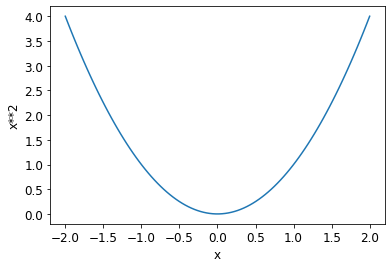

In [ ]:
plot_function(f,'x','x**2');

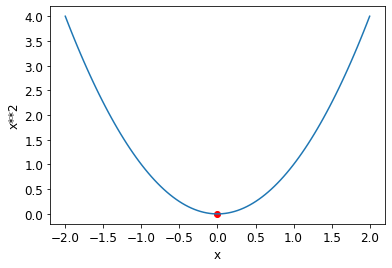

In [ ]:
plot_function(f,'x','x**2')
plt.scatter(0,f(0),color='red')

In [ ]:
xt=tensor(3.).requires_grad_()

In [ ]:
yt=f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
yt.backward()

In [ ]:
xt.grad

tensor(6.)

In [ ]:
xt=tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x):return (x**2).sum()
yt=f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [ ]:
time=torch.arange(0,20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

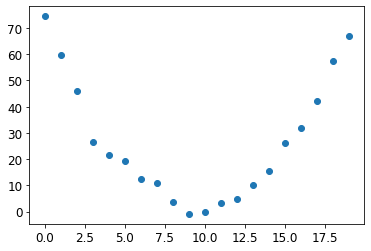

In [ ]:
speed=torch.randn(20)*3+0.75*(time-9.5)**2+1
plt.scatter(time,speed)

In [ ]:
def f(t, params):
    a,b,c=params
    return a*(t**2)+(b*t)+c

In [ ]:
def mse(preds,targets):
  return ((preds-targets)**2).mean().sqrt()

In [ ]:
params=torch.randn(3).requires_grad_()

In [ ]:
orig_params=params.clone()

In [ ]:
preds=f(time,params)

In [ ]:
def show_preds(preds,ax=None):
      if ax is None:
        fig,ax=plt.subplots()
      ax.scatter(time,speed)
      ax.scatter(time,to_np(preds),color='red')
      ax.set_ylim(-300,100)

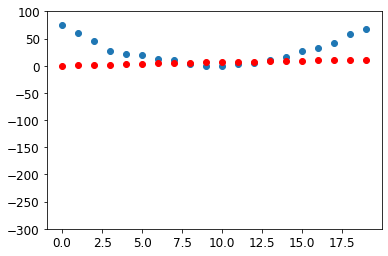

In [ ]:
show_preds(preds)

In [ ]:
loss=mse(preds,speed)
loss

tensor(113.5497, grad_fn=<SqrtBackward>)

In [ ]:
loss.backward()
params.grad

tensor([162.9150,  10.3737,   0.6128])

In [ ]:
params*1e-5

tensor([ 8.6398e-06, -1.0157e-05, -8.8875e-06], grad_fn=<MulBackward0>)

In [ ]:
params

tensor([ 0.8640, -1.0157, -0.8887], requires_grad=True)

In [ ]:
lr=1e-5
params.data-=lr*params.grad.data
params.grad=None

In [ ]:
preds=f(time,params)
mse(preds,speed)

tensor(113.2833, grad_fn=<SqrtBackward>)

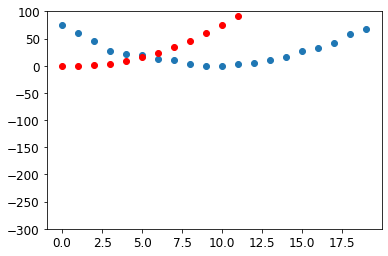

In [ ]:
show_preds(preds)

In [ ]:
def apply_step(params,n=1,prn=True):
  for i in range(n):
    preds=f(time,params)
    loss=mse(preds,speed)
    loss.backward()
    params.data-=lr*params.grad.data
    params.grad=None
    if prn: print(loss.item())
  return preds

In [ ]:
for i in range(10):
  apply_step(params)

150.47401428222656
150.2003631591797
149.9267120361328
149.6531219482422
149.37954711914062
149.10601806640625
148.83250427246094
148.5590362548828
148.28561401367188
148.01220703125


In [ ]:
params=orig_params.detach().requires_grad_()

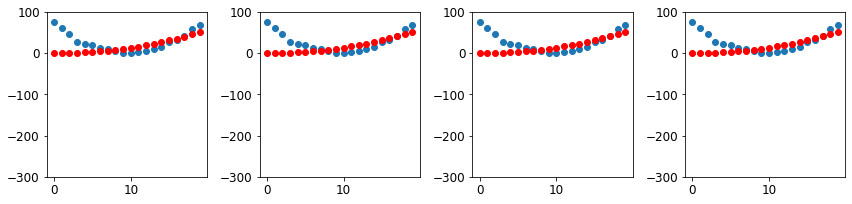

In [ ]:
_,axs=plt.subplots(1,4,figsize=(12,3))
for ax in axs:
  show_preds(apply_step(params,n=100,prn=False),ax)
plt.tight_layout()

In [ ]:
train_x=torch.cat([stacked_threes,stacked_sevens]).view(-1,28*28)
train_y=tensor([1]*len(threes)+[0]*len(sevens)).unsqueeze(1)

In [ ]:
dset=list(zip(train_x,train_y))
x,y=dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [ ]:
valid_x=torch.cat([valid_3_tens,valid_7_tens]).view(-1,28*28)
valid_y=tensor([1]*len(valid_3_tens)+[0]*len(valid_7_tens)).unsqueeze(1)
valid_dset=list(zip(valid_x,valid_y))

In [ ]:
def init_params(size,std=1.0):
  return (torch.randn(size)*std).requires_grad_()

In [ ]:
weights=init_params(28*28,1)

In [ ]:
bias=init_params(1)

In [ ]:
(train_x[0]*weights.T).sum()+bias

tensor([5.3017], grad_fn=<AddBackward0>)

In [ ]:
def linear1(xb):
  return xb@weights+bias
preds=linear1(train_x)
preds

tensor([ 5.3017,  6.8557, 16.4948,  ..., -3.7922,  4.1024,  0.1021], grad_fn=<AddBackward0>)

In [ ]:
corrects=(preds>0.0).float()==train_y
corrects

tensor([[ True,  True,  True,  ..., False,  True,  True],
        [ True,  True,  True,  ..., False,  True,  True],
        [ True,  True,  True,  ..., False,  True,  True],
        ...,
        [False, False, False,  ...,  True, False, False],
        [False, False, False,  ...,  True, False, False],
        [False, False, False,  ...,  True, False, False]])

In [ ]:
corrects.float().mean().item()

0.497275710105896

In [ ]:
with torch.no_grad():
  weights[0]*=1.0001

In [ ]:
preds=linear1(train_x)
((preds>0.0).float()==train_y).float().mean().item()

0.497275710105896

In [ ]:
trgts=tensor([1,0,1])
prds=tensor([0.9,0.4,0.2])

In [ ]:
def mnist_loss(predictions,targets):
  return torch.where(targets==1,1-predictions,predictions).mean()

In [ ]:
torch.where(trgts==1,1-prds,prds)

tensor([0.1000, 0.4000, 0.8000])

In [ ]:
mnist_loss(tensor([0.9,0.4,0.8]),trgts)

tensor(0.2333)

In [ ]:
def sigmoid(x): return 1/(1+torch.exp(-x))

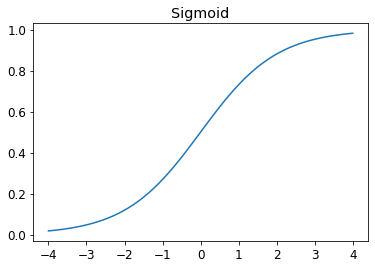

In [ ]:
plot_function(torch.sigmoid,title='Sigmoid',min=-4,max=4)

In [ ]:
def mnist_loss(predictions,targets):
  predictions=predictions.sigmoid()
  return torch.where(targets==1,1-predictions,predictions).mean()

In [ ]:
coll=range(15)
dl=DataLoader(coll,batch_size=5,shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [ ]:
ds=L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [ ]:
dl=DataLoader(ds,batch_size=6,shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

In [ ]:
for x,y in dl:
  pred=model(x)
  loss=loss_func(pred,y)
  loss.backward()
  parameters-=parameters.grad*lr

NameError: ignored

In [ ]:
weights=init_params((28*28,1))
bias=init_params(1)

In [ ]:
dl=DataLoader(dset,batch_size=256)
xb,yb=first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [ ]:
valid_dl=DataLoader(valid_dset,batch_size=256)

In [ ]:
batch=train_x[:4]
batch.shape

torch.Size([4, 784])

In [ ]:
loss=mnist_loss(preds,train_y[:4])
loss

tensor(0.2580, grad_fn=<MeanBackward0>)

In [ ]:
loss.backward()
#weights.grad.shape,weights.grad.mean(),bias.grad

RuntimeError: ignored

In [ ]:
def calc_grad(xb,yb,model):
  preds=model(xb)
  loss=mnist_loss(preds,yb)
  loss.backward()

In [ ]:
calc_grad(batch,train_y[:4],linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0160), tensor([-0.0973]))

In [ ]:
calc_grad(batch,train_y[:4],linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0213), tensor([-0.1297]))

In [ ]:
weights.grad.zero_()
bias.grad.zero_();

In [ ]:
def train_epoch(model,lr,params):
  for xb,yb in dl:
    calc_grad(xb,yb,model)
    for p in params:
      p.data-=p.grad*lr
      p.grad.zero_()

In [ ]:
(preds>0.0).float()==train_y[:4]

tensor([[ True,  True,  True,  ..., False,  True,  True],
        [ True,  True,  True,  ..., False,  True,  True],
        [ True,  True,  True,  ..., False,  True,  True],
        [ True,  True,  True,  ..., False,  True,  True]])

In [ ]:
def batch_accracy(xb,yb):
  preds=xb.sigmoid()
  correct=(preds>0.5)==yb
  return correct.float().mean()

In [ ]:
batch_accracy(linear1(batch),train_y[:4])

tensor(1.)

In [ ]:
def validate_epoch(model):
  accs=[batch_accracy(model(xb),yb) for xb,yb in valid_dl]
  return round(torch.stack(accs).mean().item(),4)

In [ ]:
validate_epoch(linear1)

0.767

In [ ]:
lr=1.
params=weights,bias
train_epoch(linear1,lr,params)
validate_epoch(linear1)

0.7695

In [ ]:
for i in range(20):
  train_epoch(linear1,lr,params)
  print(validate_epoch(linear1),end=' ')

0.8788 0.9174 0.9349 0.9467 0.9535 0.9559 0.9618 0.9647 0.9686 0.9711 0.9716 0.9721 0.9731 0.9745 0.975 0.9755 0.9755 0.976 0.977 0.9775 

In [ ]:
linear_model=nn.Linear(28*28,1)

In [ ]:
w,b=linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [ ]:
class BasicOptim:
  def __init__(self,params,lr):self.params,self.lr=list(params),lr

  def step(self, *args, **kwargs):
    for p in self.params: p.data-=p.grad.data*self.lr

  def zero_grad(self,*args,**kwargs):
    for p in self.params: p.grad=None

In [ ]:
opt=BasicOptim(linear_model.parameters(),lr)

In [ ]:
def train_epoch(model):
  for xb,yb in dl:
    calc_grad(xb,yb,model)
    opt.step()
    opt.zero_grad()

In [ ]:
validate_epoch(linear_model)

0.548

In [ ]:
def train_model(model,epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model),end=' ')

In [ ]:
train_model(linear_model,20)

0.4932 0.7729 0.8589 0.9165 0.937 0.9497 0.957 0.9629 0.9658 0.9673 0.9692 0.9717 0.9746 0.9751 0.9761 0.977 0.9775 0.978 0.9785 0.9785 

In [ ]:
linear_model=nn.Linear(28*28,1)
opt=SGD(linear_model.parameters(),lr)
train_model(linear_model,20)

0.4932 0.7393 0.8652 0.9175 0.9365 0.9497 0.9565 0.9634 0.9658 0.9673 0.9712 0.9726 0.9741 0.9751 0.9761 0.9761 0.9775 0.978 0.9785 0.9785 

In [ ]:
dls=DataLoader(dl,valid_dl)

In [ ]:
learn=Learner(dls,nn.Linear(28*28,1),opt_func=SGD,
              loss_func=mnist_loss,metrics=batch_accracy)

In [ ]:
learn.fit(10,lr=lr)

AttributeError: ignored

In [ ]:
def simple_net(xb):
  res=xb@w1+b1
  res=res.max(tensor(0.0))
  res=res@w2+b2
  return res

In [ ]:
w1=init_params((28*28,30))
b1=init_params(30)
w2=init_params((30,1))
b2=init_params(1)

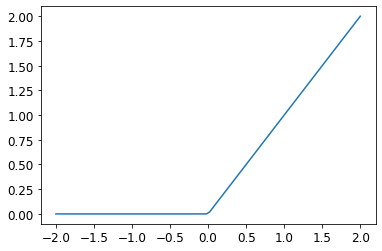

In [ ]:
plot_function(F.relu)

In [ ]:
simple_net=nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [ ]:
learn=Learner(dls,simple_net,opt_func=SGD,
              loss_func=mnist_loss,metrics=batch_accracy)

In [ ]:
learn.fit(40,0.1)

AttributeError: ignored

In [ ]:
learn.recorder.values[-1][-2]

IndexError: ignored

In [ ]:
dls=ImageDataLoaders.from_folder(path)
learn=cnn_learner(dls,resnet18,pretrained=False,
                  loss_func=F.cross_entropy,metrics=accuracy)
learn.fit_one_cycle(1,0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.143302,0.029645,0.994603,03:49
